In [143]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

In [144]:
def encodage(data):
    data_encoded = data.copy()
    cat_mask=data.dtypes=="object"
    list_cat_columns=list(data.columns[cat_mask])
    ordinal_encoder=OrdinalEncoder()
    data_encoded[list_cat_columns]=ordinal_encoder.fit_transform(data[list_cat_columns])
    return(data_encoded)

def afficherHist(data):
    plt.figure(figsize=(10,5))  
    for i,column in enumerate(data.columns,1): #enumerate(X.columns,1) pour commencer à 1
        plt.subplot(1,3,i)
        value_counts = data[column].value_counts()
        plt.bar(value_counts.index, value_counts.values)
        plt.title(column)

    plt.tight_layout()
    plt.show()

In [145]:
pd.set_option('display.max_columns', None)

DataSet=pd.read_csv('maestro-v3.0.0.csv')
X=DataSet.copy()
X=X.set_index('canonical_title')
X=X.drop(['audio_filename','midi_filename'],axis=1)
X=encodage(X)
#Créer trois datasets correspondant aux datasets de train,test et de validation en enlevant la colonne split
X_train=X[X['split']==1].drop(['split'],axis=1)
X_test=X[X['split']==0].drop(['split'],axis=1)
X_valid=X[X['split']==2].drop(['split'],axis=1)
print(X_valid)

                                        canonical_composer  year     duration
canonical_title                                                              
3 Etudes, Op. 65                                       1.0  2006   397.857508
5 Preludes, Op.15                                      1.0  2009   400.557826
Etude Op. 8, No. 13                                    1.0  2009   167.085837
Fragilite, Op.51                                       1.0  2009   138.421336
Sonata No. 4 in F-sharp Major ,Op.30                   1.0  2013   440.110404
...                                                    ...   ...          ...
Prelude in C-sharp Minor, Op. 3, No. 2                56.0  2004   231.917051
Sonata in C Major, K279                               59.0  2015   598.585417
Sonata in F                                           59.0  2006  1075.489042
Sonata in F Major, K533                               59.0  2004  1139.198478
Sonata in F Major, K533/K494                          59.0  2018

In [146]:
print(X_train[['year','duration']].describe()) #Faire une description des compositeurs ici n'a pas de sens

              year     duration
count   962.000000   962.000000
mean   2011.295218   595.922497
std       4.370243   461.433594
min    2004.000000    45.169560
25%    2008.000000   272.314431
50%    2011.000000   485.909760
75%    2015.000000   709.027547
max    2018.000000  2624.663508


In [147]:
print(X_test[['year','duration']].describe()) #Faire une description des compositeurs ici n'a pas de sens

              year     duration
count   177.000000   177.000000
mean   2011.372881   406.372436
std       4.078345   293.916916
min    2004.000000    65.948118
25%    2008.000000   230.070550
50%    2011.000000   306.104269
75%    2015.000000   442.826747
max    2018.000000  1579.194468


In [148]:
print(X_valid[['year','duration']].describe()) #Faire une description des compositeurs ici n'a pas de sens

              year     duration
count   137.000000   137.000000
mean   2011.262774   510.556082
std       4.602221   426.232473
min    2004.000000    45.155208
25%    2008.000000   257.133824
50%    2011.000000   359.457440
75%    2015.000000   566.314872
max    2018.000000  2457.807371


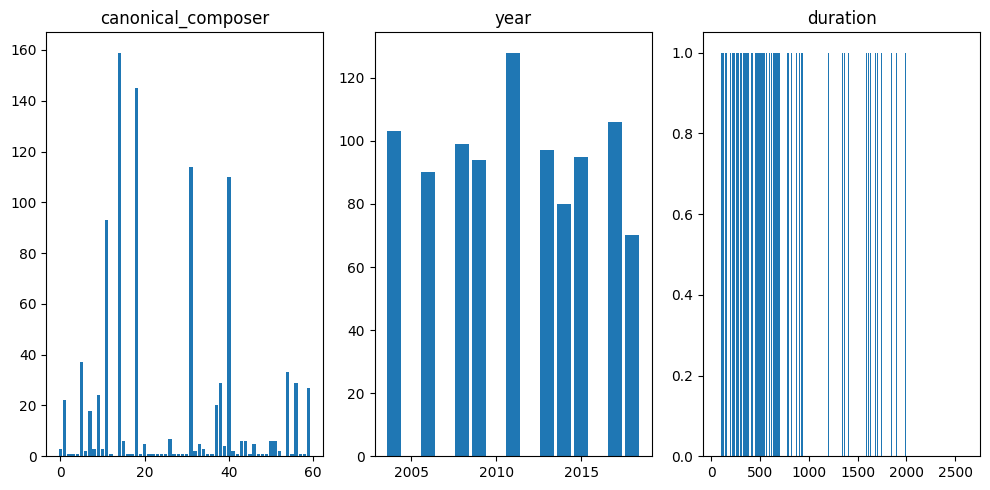

In [153]:
afficherHist(X_train)

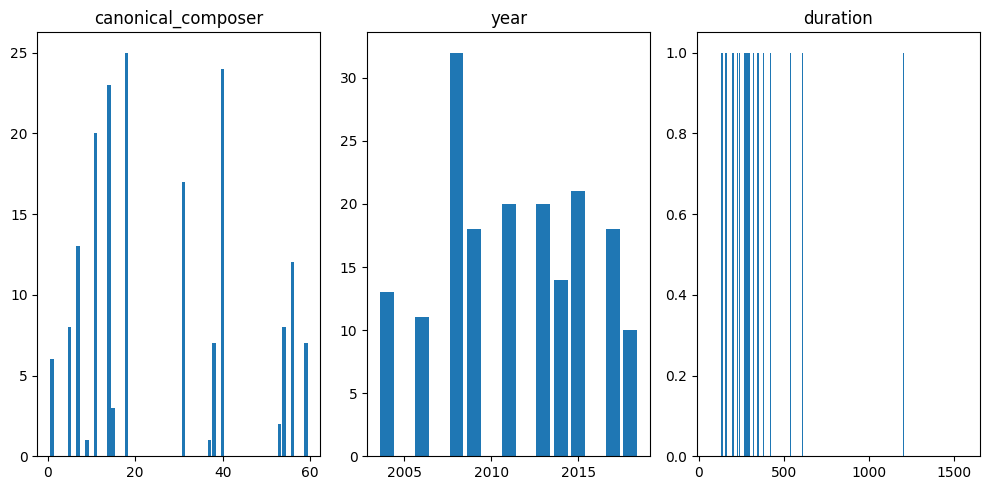

In [150]:
afficherHist(X_test)

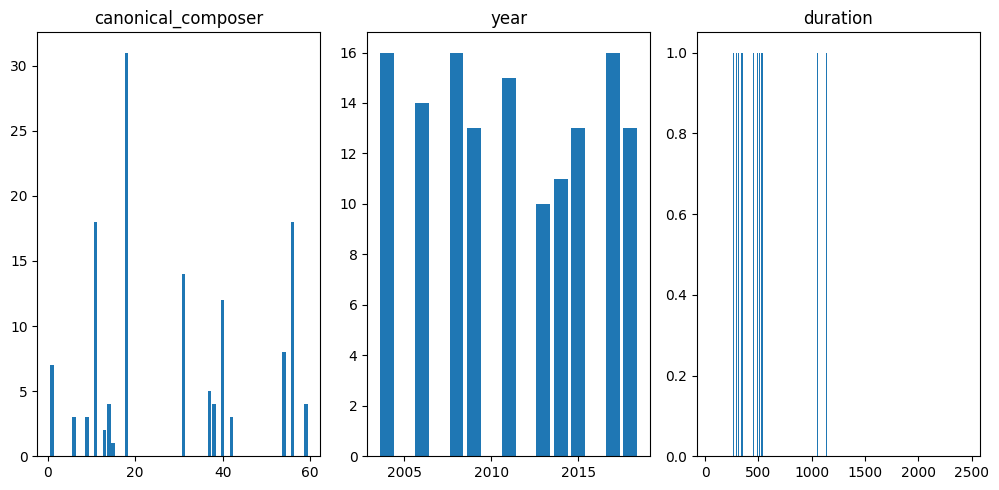

In [151]:
afficherHist(X_valid)

In [154]:
X.corr()

,canonical_composer,split,year,duration
canonical_composer,1.000000,0.038564,-0.026175,0.088824
split,0.038564,1.000000,-0.006511,0.073047
year,-0.026175,-0.006511,1.000000,0.014834
duration,0.088824,0.073047,0.014834,1.000000
